In [1]:
# @title
### EP2 MAC0417 / MAC5768
################################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,               #
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO                   #
# DESTE EP.                                                                    #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM,                 #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM                        #
# DESONESTIDADE ACADÊMICA OU PLÁGIO.                                           #
#                                                                              #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS                      #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A                        #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E                      #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS                  #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP.                                         #
#                                                                              #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO                       #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR                           #
# DESONESTIDADE ACADÊMICA.                                                     #
#                                                                              #
#  Nome : Lucas Paiolla Forastiere                                             #
#  NUSP : 11221911                                                             #
#  Turma: MAC5768                                                              #
#  Prof.: Ronaldo Fumio Hashimoto                                              #
################################################################################

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extra non "data science / image processing" libraries
from pathlib import Path
from tqdm.notebook import tqdm


In [3]:
augmented_dataset = np.fromfile("augmentedDataset.npy", dtype=np.uint8).reshape(8592, 385, 217)
augmented_dataset.shape

(8592, 385, 217)

In [4]:
augmented_metadata = pd.read_csv("augmented_metadata.csv")
augmented_metadata

file_path  height  width  \
0     data/blue_night_outside/phone-blackkc-bluebs-d...     385    217   
1     data/blue_night_outside/phone-blackkc-bluebs-d...     385    217   
2     data/blue_night_outside/phone-blackkc-bluebs-d...     385    217   
3     data/blue_night_outside/phone-blackkc-bluebs-d...     385    217   
4          data/blue_night_outside/bluebs-mic-phone.jpg     385    217   
...                                                 ...     ...    ...   
8587  data/lightblue_night_inside/d6-mic-switch-blac...     385    217   
8588  data/lightblue_night_inside/watch-brownbs-d6-b...     385    217   
8589  data/lightblue_night_inside/watch-brownbs-d6-b...     385    217   
8590  data/lightblue_night_inside/watch-brownbs-d6-b...     385    217   
8591  data/lightblue_night_inside/watch-brownbs-d6-b...     385    217   

      channels background illumination environment  \
0            3       blue        night     outside   
1            3       blue        night     outside   
2            3       blue        night     outside   
3            3       blue        night     outside   
4            3       blue        night     outside   
...        ...        ...          ...         ...   
8587         3  lightblue        night      inside   
8588         3  lightblue        night      inside   
8589         3  lightblue        night      inside   
8590         3  lightblue        night      inside   
8591         3  lightblue        night      inside   

                      objects_in_image_code objects_in_image_numeric  \
0     ['phone', 'blackkc', 'bluebs', 'd20']             [8, 1, 5, 4]   
1     ['phone', 'blackkc', 'bluebs', 'd20']             [8, 1, 5, 4]   
2     ['phone', 'blackkc', 'bluebs', 'd20']             [8, 1, 5, 4]   
3     ['phone', 'blackkc', 'bluebs', 'd20']             [8, 1, 5, 4]   
4                ['bluebs', 'mic', 'phone']                [5, 9, 8]   
...                                     ...                      ...   
8587     ['d6', 'mic', 'switch', 'blackkc']             [3, 9, 0, 1]   
8588   ['watch', 'brownbs', 'd6', 'bluebs']             [7, 6, 3, 5]   
8589   ['watch', 'brownbs', 'd6', 'bluebs']             [7, 6, 3, 5]   
8590   ['watch', 'brownbs', 'd6', 'bluebs']             [7, 6, 3, 5]   
8591   ['watch', 'brownbs', 'd6', 'bluebs']             [7, 6, 3, 5]   

     label_code  label_numeric     augmentation  
0         phone              8              NaN  
1       blackkc              1              NaN  
2        bluebs              5              NaN  
3           d20              4              NaN  
4        bluebs              5              NaN  
...         ...            ...              ...  
8587    blackkc              1  gaussian_kernel  
8588      watch              7  gaussian_kernel  
8589    brownbs              6  gaussian_kernel  
8590         d6              3  gaussian_kernel  
8591     bluebs              5  gaussian_kernel  

[8592 rows x 12 columns]

In [5]:
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    return cdf[image]

In [6]:
normalized_dataset = []
for i in tqdm(range(len(augmented_dataset))):
    normalized_dataset.append(histogram_equalization(augmented_dataset[i]))
normalized_dataset = np.array(normalized_dataset)
normalized_dataset.shape

  0%|          | 0/8592 [00:00<?, ?it/s]

(8592, 385, 217)

In [7]:
augmented_metadata["augmentation"] = augmented_metadata["augmentation"].fillna("None")
augmentations = augmented_metadata["augmentation"].unique()
print(augmentations)
illuminations = augmented_metadata["illumination"].unique()
print(illuminations)

['None' 'contrast_stretching' 'log' 'power_law' 'laplacian_kernel'
 'gaussian_kernel']
['night' 'day']


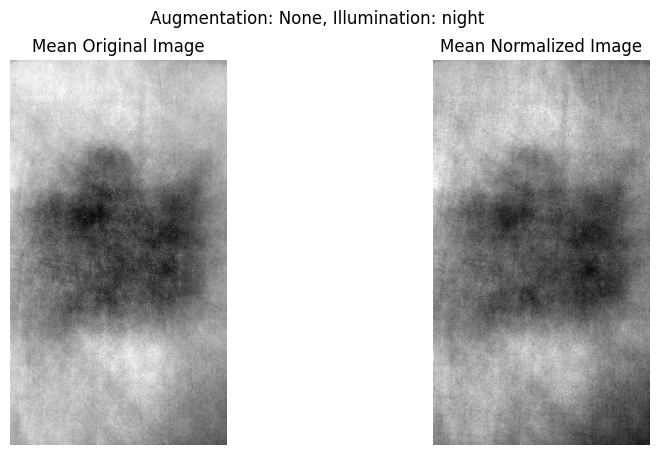

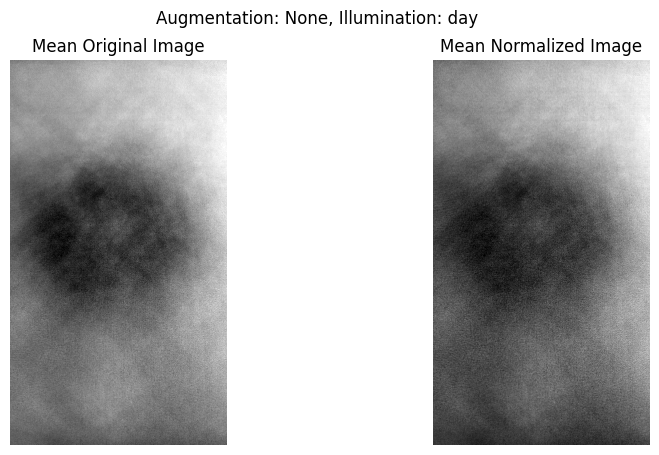

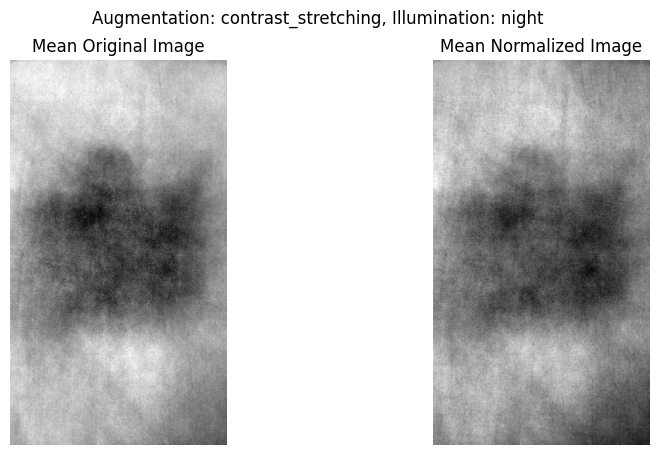

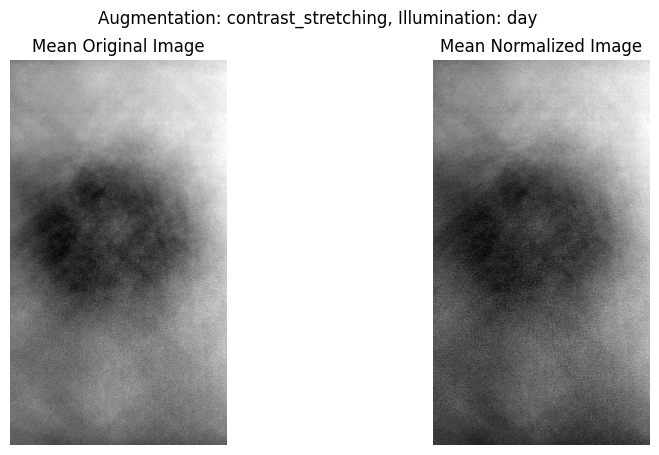

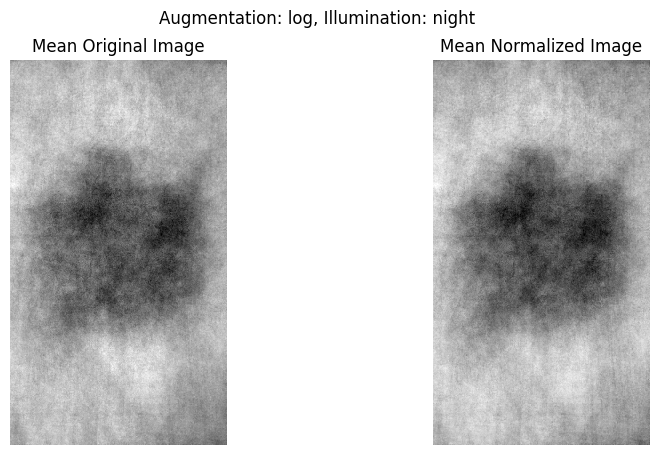

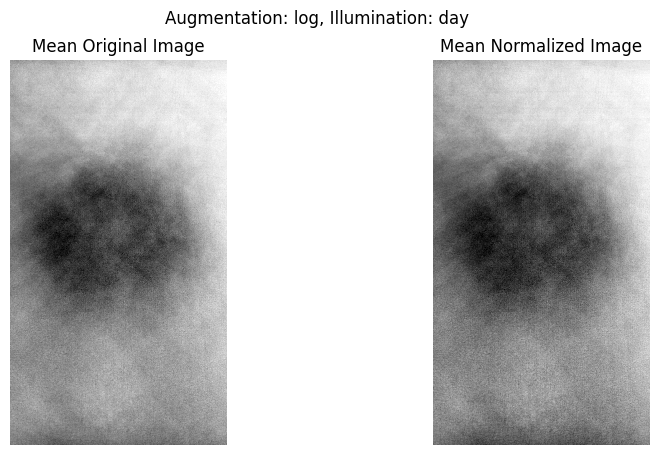

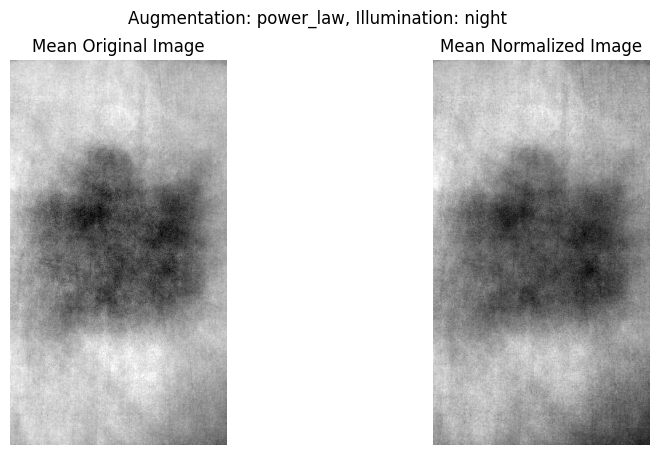

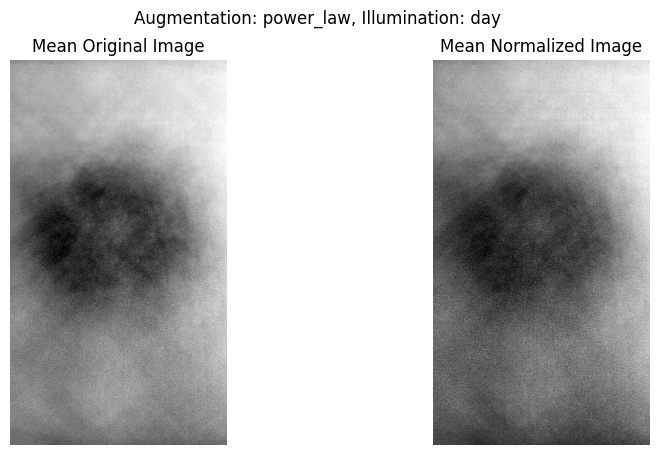

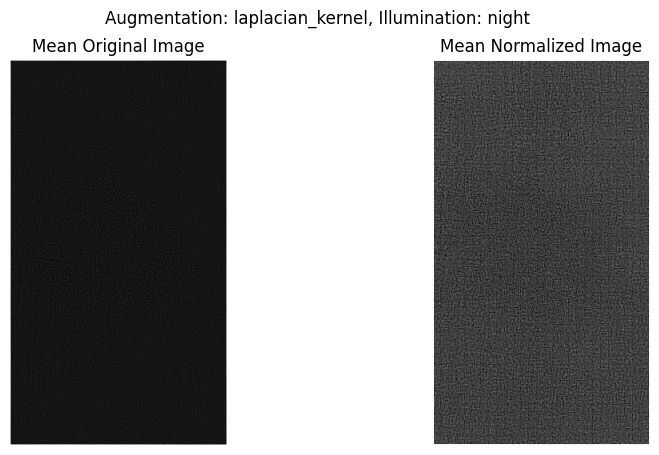

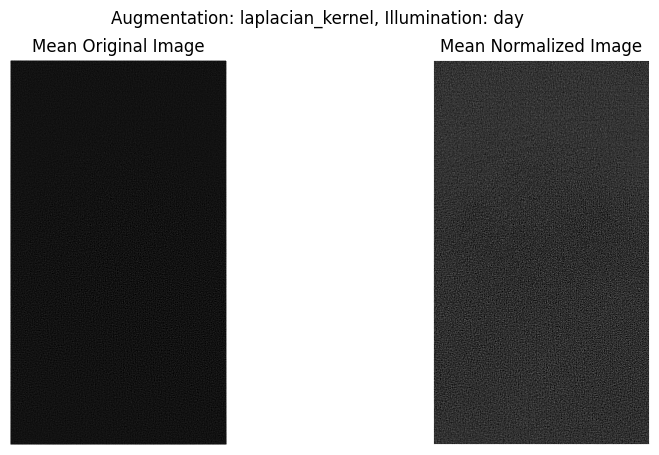

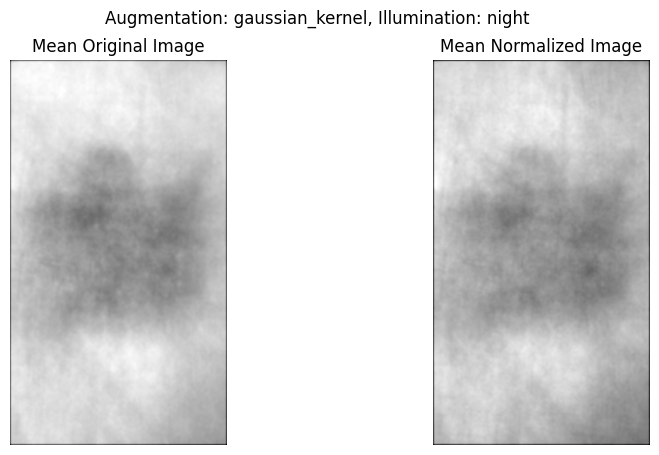

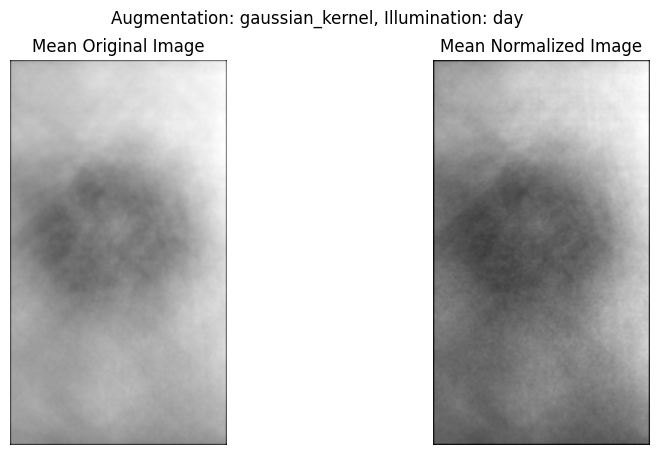

In [8]:
from itertools import product


for augmentation, illumination in product(augmentations, illuminations):
    idxs = augmented_metadata[
        (augmented_metadata["augmentation"] == augmentation) &
        (augmented_metadata["illumination"] == illumination)
    ].index
    idxs = list(idxs)
    original_imgs = augmented_dataset[idxs]
    normalized_imgs = normalized_dataset[idxs]
    mean_original_img = np.mean(original_imgs, axis=0)
    mean_normalized_img = np.mean(normalized_imgs, axis=0)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(mean_original_img, cmap="gray")
    axs[0].set_title("Mean Original Image")
    axs[0].axis("off")
    axs[1].imshow(mean_normalized_img, cmap="gray")
    axs[1].set_title("Mean Normalized Image")
    axs[1].axis("off")
    fig.suptitle(f"Augmentation: {augmentation}, Illumination: {illumination}")
    plt.show()


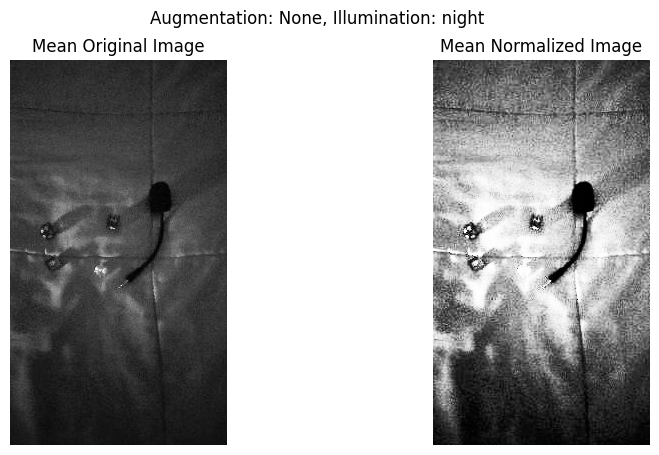

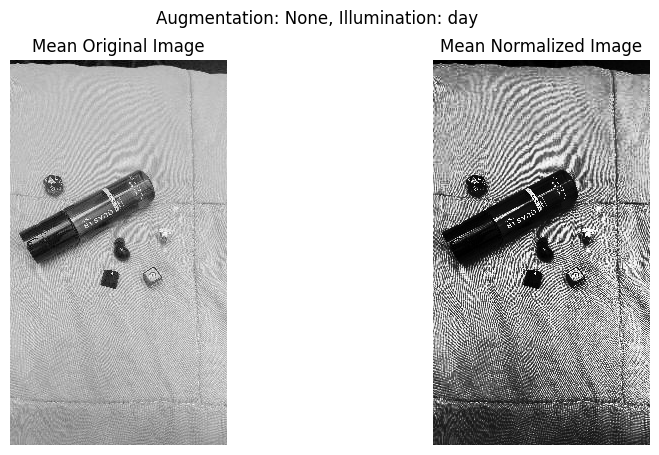

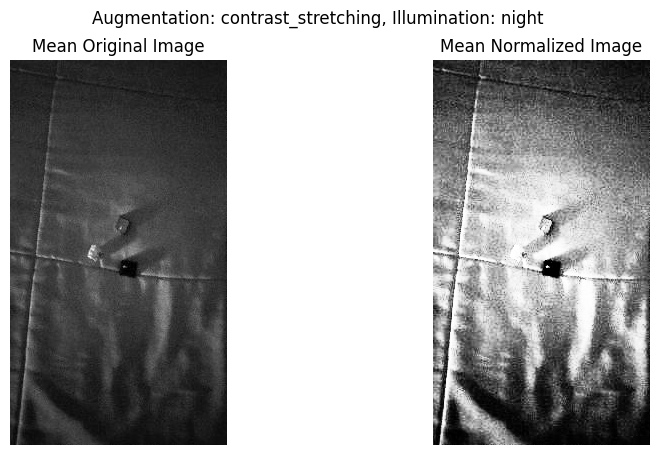

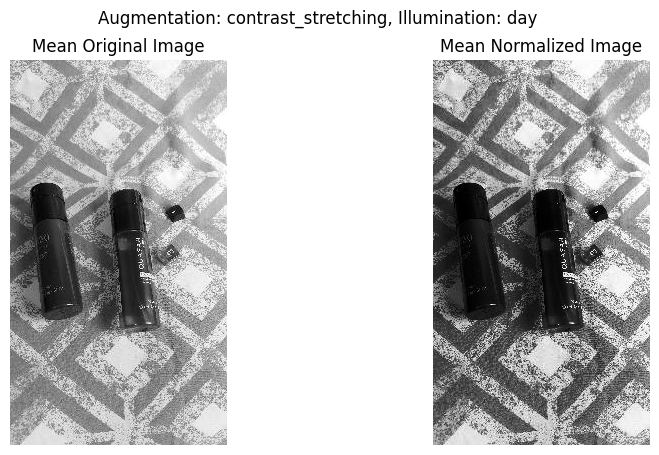

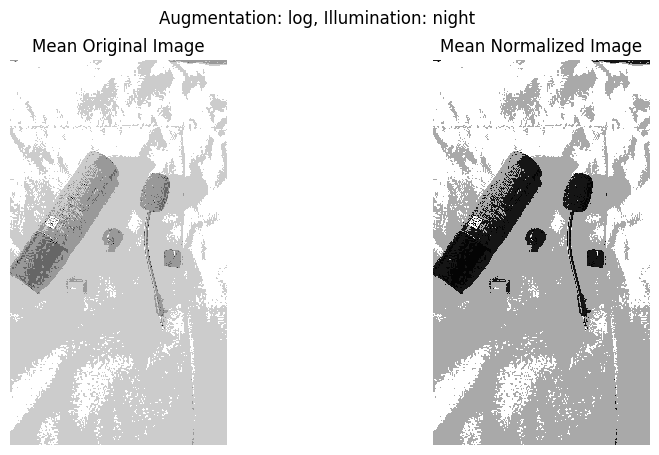

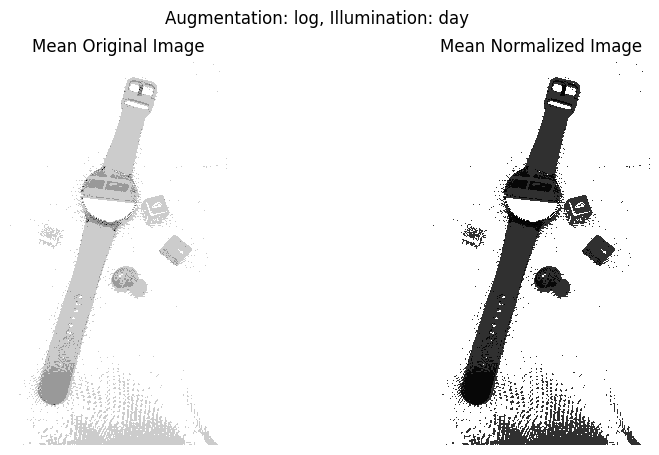

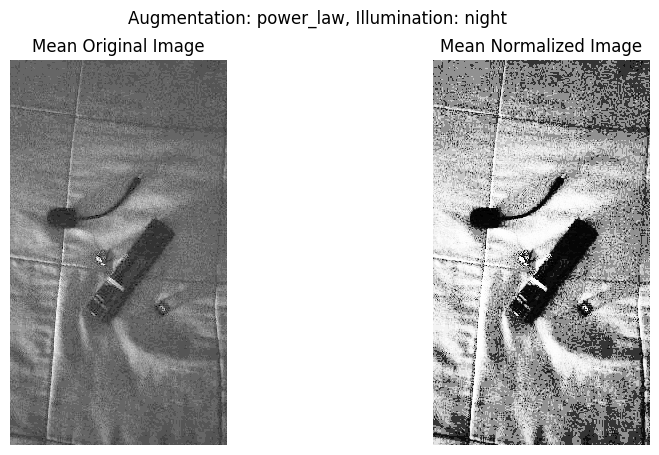

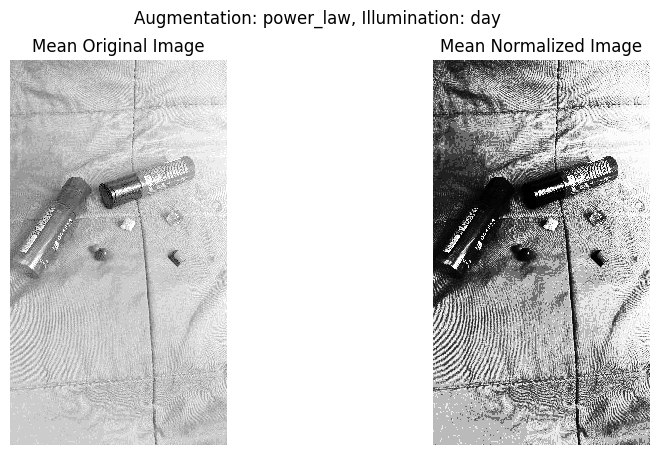

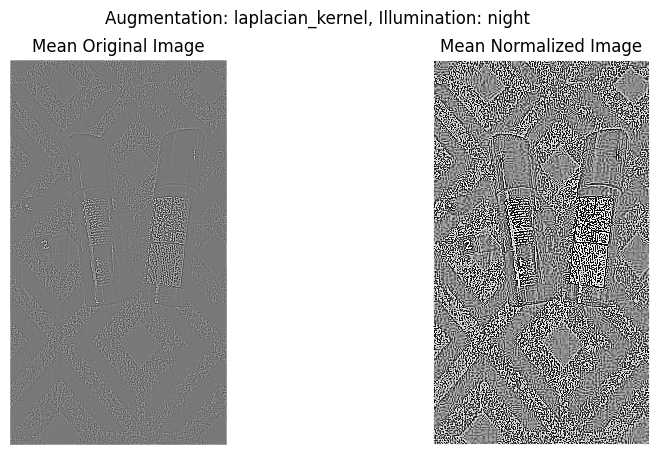

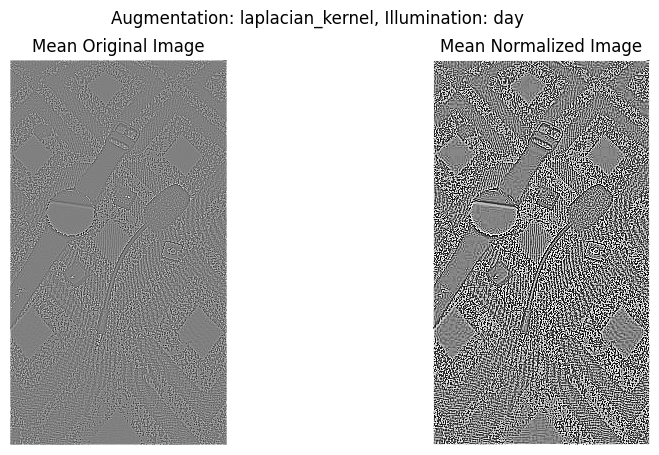

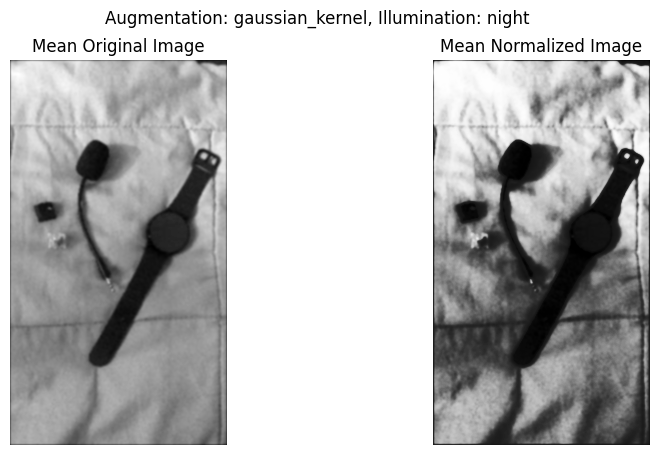

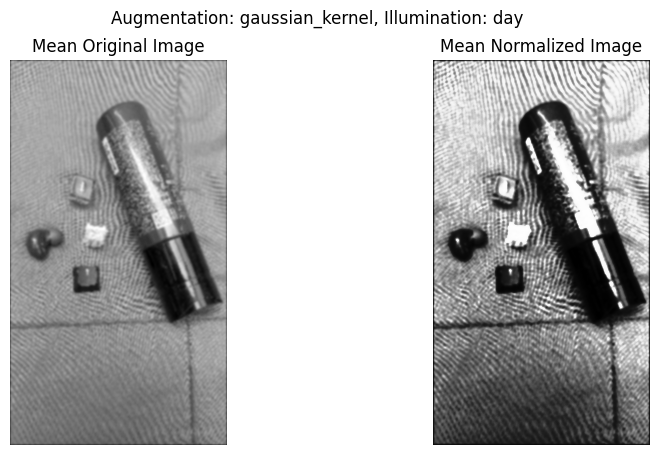

In [9]:
for augmentation, illumination in product(augmentations, illuminations):
    idxs = augmented_metadata[
        (augmented_metadata["augmentation"] == augmentation) &
        (augmented_metadata["illumination"] == illumination)
    ].index
    idxs = list(idxs)
    random_idx = np.random.choice(idxs)
    original_img = augmented_dataset[random_idx]
    normalized_img = normalized_dataset[random_idx]

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original_img, cmap="gray")
    axs[0].set_title("Mean Original Image")
    axs[0].axis("off")
    axs[1].imshow(normalized_img, cmap="gray")
    axs[1].set_title("Mean Normalized Image")
    axs[1].axis("off")
    fig.suptitle(f"Augmentation: {augmentation}, Illumination: {illumination}")
    plt.show()


We see that normalizing the images increases the contrast and, in some cases, makes the objects more visible and distinguishable from the background. In order cases, though (specially for white objects), the normalization doesn't help much.

We can observe specific in the log augmentation that the normalization was really good to make the objects more visible and distinguishable from the background. In the laplacian convolution, however, it really doesn't seem to help at all.

In general, I think the normalization was good specially for the day illumination, but it seems to help a little at night as well.
